In [132]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
cd /content/gdrive/MyDrive/Code/

/content/gdrive/MyDrive/Code


In [134]:
# p_df = pd.read_json("virgool_removed_word_112_4.json" )
# p_df.head(3)

import pandas as pd
df = pd.read_csv('drug_dataset.csv')
df = pd.DataFrame(df)
df.head(1)

,Section_Number,Link,drug_name,title,text
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...


##1- Spacy transformers

https://techblog.assignar.com/how-to-use-bert-sentence-embedding-for-clustering-text/

In [ ]:
!pip install -q -U spacy

distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None


In [ ]:
## Install libraries
! python -m pip install -q --upgrade pip --quiet
# ! pip install spacy --quiet
! pip3 install -q spacy-transformers --quiet
! python -m spacy download en_trf_bertbaseuncased_lg --quiet

distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
2021-07-28 11:54:42.050898: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

✘ No compatible package f

In [19]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')

from nltk.corpus import stopwords
stop = stopwords.words('english')

import pandas as pd
from nltk.stem.snowball import SnowballStemmer

from nltk.tokenize import regexp_tokenize , word_tokenize
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# from sentence_transformers import SentenceTransformer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!python -m spacy download en_core_web_lg

2021-07-28 11:54:49.085169: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 777.1 MB 16 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
titles = set(df['title'].str.lower())
sentences = list(titles)
len(sentences)

136

In [ ]:
#################################################
# way 1
#################################################
#Load bert model
# nlp = en_trf_bertbaseuncased_lg.load()
import spacy
nlp = spacy.load('en_core_web_lg')

# Utility function for generating sentence embedding from the text
def get_embeddinngs(text):
    return nlp(text).vector

# Generating sentence embedding from the text
df_sent=pd.DataFrame({"sentence":sentences})
df_sent['sent_vectors'] = df_sent['sentence'].apply(get_embeddinngs)
vectors = df_sent['sent_vectors'].apply(pd.Series)
print("Vector Shape: " , vectors.shape)

################################################
# way 2
################################################
# df_sent=pd.DataFrame({"sentence":sentences})

# df_sent['tokenized'] = df_sent['sentence'].apply(nlp)
# df_sent['sent_vectors'] = df_sent['tokenized'].apply(lambda x: x.vector)
# vectors = df_sent['sent_vectors'].apply(pd.Series)
# print("Vector Shape: " , vectors.shape)

Vector Shape:  (136, 300)


In [ ]:
# Hyperparameter 1 
n_dimention = 2
pca = PCA(n_components=n_dimention)
reduced_data = pca.fit_transform(vectors)

In [ ]:
reduced_data.shape

(136, 2)

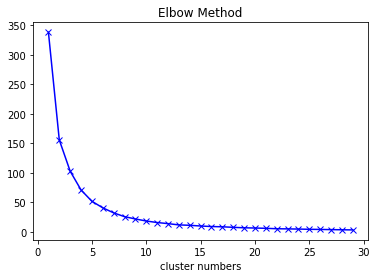

In [ ]:
SSE = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(reduced_data)
    SSE.append(kmeans.inertia_)
    
plt.plot(range(1, 30), SSE, 'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

###Apply Kmeans by
1- from nltk.cluster import KMeansClusterer

2- from sklearn import cluster

In [ ]:
# Hyperparameter 2
n_clusters = 5

km = KMeans(n_clusters=n_clusters)

km.fit(reduced_data)
centers = km.cluster_centers_.argsort()[:,::-1]

print("Len of Labels: ",
       len(set(km.labels_)), 
       " Params: ", 
       km.get_params())

cluster_assignment = km.labels_

Len of Labels:  5  Params:  {'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 5, 'n_init': 10, 'n_jobs': None, 'precompute_distances': 'auto', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [ ]:
len(centers[0])

2

In [ ]:
for i in range(10):
    print(sentences[i], km.predict(reduced_data[i].reshape(-1, 1).T))

brand names of combination products [2]
who should not get hepatitis a vaccine or should wait? [3]
browse by generic or brand name: [2]
what is hpv? [3]
who should get this hpv vaccine and when? [3]
what is hpv vaccine? [3]
what are the risks from anthrax vaccine? [3]
who should get je vaccine and when? [3]
how is the janssen (johnson and johnson) covid-19 vaccine given? [3]
what are the risks of the pfizer-biontech covid-19 vaccine? [3]


In [ ]:
df.shape[0]

17743

In [ ]:
print(len(cluster_assignment))

136


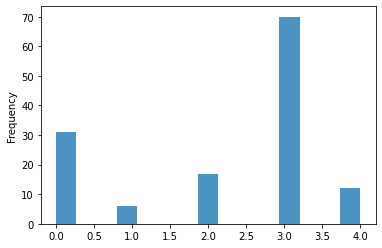

In [ ]:
df_intent = pd.DataFrame()   
df_intent['intent'] = cluster_assignment
ax = df_intent['intent'].plot.hist(bins=15, alpha=0.8)

In [ ]:
# df['title'][0] == 'Why is this medication prescribed?'
# sentences , df.title.values

In [ ]:
k = 0

df['intent'] = ""
for i in df.title.values:
  for j in range(len(sentences)):
    # print(j)
    if i.lower() == sentences[j] : 
       df['intent'][k] = km.predict(reduced_data[j].reshape(-1, 1).T)[0]
       k += 1 
  # break   

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launch

##Labled Data

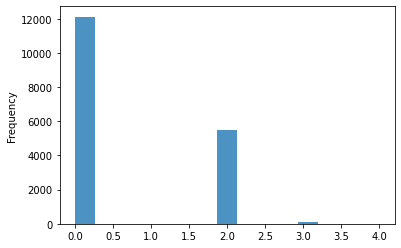

In [ ]:
ax = df['intent'].plot.hist(bins=15, alpha=0.8)

In [ ]:
ax = df['intent'].plot.hist(bins=15, alpha=0.8)

print("class_1: " , (df['intent'] ==0).sum())
print("class_2: " , (df['intent'] ==1).sum())
print("class_3: ", (df['intent'] ==2).sum())
print("class_4: ", (df['intent'] ==3).sum())
print("class_5: ", (df['intent'] ==4).sum())
# print("class_5: ", (df['intent'] ==5).sum())

class_1:  12126
class_2:  6
class_3:  5480
class_4:  114
class_5:  17


##Answer Clustering

In [43]:
# p_df = pd.read_json("virgool_removed_word_112_4.json" )
# p_df.head(3)

import pandas as pd
df = pd.read_csv('drug_dataset.csv')
df = pd.DataFrame(df)
df.head(1)

,Section_Number,Link,drug_name,title,text
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...


In [7]:
df.dropna(subset = ["text"], inplace=True)
# titles = set(df['text'].str.lower())
titles = df['text'].str.lower()

sentences = list(titles)
len(sentences)

17741

In [15]:
for i in range(len(sentences)):
  # print(sentences[i])
  if len(sentences[i])<  2 :
    print(sentences[i])
  break


In [40]:
df.dropna(inplace=True)
df = df.reset_index

In [16]:
#################################################
# way 1
#################################################
#Load bert model
# nlp = en_trf_bertbaseuncased_lg.load()
import spacy
nlp = spacy.load('en_core_web_lg')

# Utility function for generating sentence embedding from the text
def get_embeddinngs(text):
    return nlp(text).vector

# Generating sentence embedding from the text
df_sent=pd.DataFrame({"sentence":sentences})
df_sent['sent_vectors'] = df_sent['sentence'].apply(get_embeddinngs)
vectors = df_sent['sent_vectors'].apply(pd.Series)
print("Vector Shape: " , vectors.shape)

################################################
# way 2
################################################
# df_sent=pd.DataFrame({"sentence":sentences})

# df_sent['tokenized'] = df_sent['sentence'].apply(nlp)
# df_sent['sent_vectors'] = df_sent['tokenized'].apply(lambda x: x.vector)
# vectors = df_sent['sent_vectors'].apply(pd.Series)
# print("Vector Shape: " , vectors.shape)

Vector Shape:  (17741, 300)


In [20]:
# Hyperparameter 1 
n_dimention = 10
pca = PCA(n_components=n_dimention)
reduced_data = pca.fit_transform(vectors)

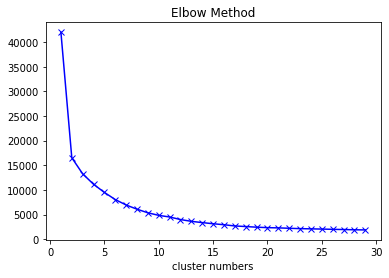

In [147]:
SSE = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(reduced_data)
    SSE.append(kmeans.inertia_)
    
plt.plot(range(1, 30), SSE, 'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

In [21]:
# Hyperparameter 2
n_clusters = 5

km = KMeans(n_clusters=n_clusters)

km.fit(reduced_data)
centers = km.cluster_centers_.argsort()[:,::-1]

print("Len of Labels: ",
       len(set(km.labels_)), 
       " Params: ", 
       km.get_params())

cluster_assignment = km.labels_

Len of Labels:  5  Params:  {'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 5, 'n_init': 10, 'n_jobs': None, 'precompute_distances': 'auto', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


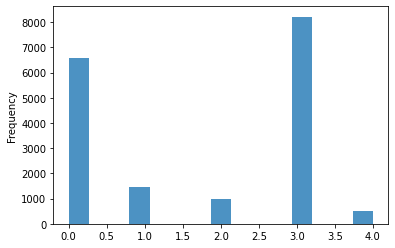

In [22]:
df_intent = pd.DataFrame()   
df_intent['intent_text'] = cluster_assignment
ax = df_intent['intent_text'].plot.hist(bins=15, alpha=0.8)

In [25]:
df.dropna(subset = ["text"], inplace=True)
df.shape

In [24]:
reduced_data.shape

(17741, 10)

In [26]:
len(sentences)

17741

In [27]:
km.predict(reduced_data[0].reshape(-1, 1).T)[0]

0

In [34]:
type(df)

method

In [38]:

k = 0

df['intent_text'] = ""
for i in df.title.values:
  for j in range(len(sentences)):
    # print(j)
    if i.lower() == sentences[j] : 
       df['intent_text'][k] = km.predict(reduced_data[j].reshape(-1, 1).T)[0]
       k += 1 
  # break   

In [45]:
# df["intent_text"][6893]
# df.drop(df.index[6893])
# df.reset_index

In [47]:
# df.dropna(subset = ["intent_text"], inplace=True)

# ax = df['intent_text'].plot.hist(bins=15, alpha=0.8)
# print("class_1: " , (df['intent_text'] ==0).sum())
# print("class_2: " , (df['intent_text'] ==1).sum())
# print("class_3: ", (df['intent_text'] ==2).sum())
# print("class_4: ", (df['intent_text'] ==3).sum())
# print("class_5: ", (df['intent_text'] ==4).sum())
# print("class_5: ", (df['intent'] ==5).sum())

##2- Bert

https://theaidigest.in/how-to-cluster-text-documents-using-bert/

In [ ]:
!pip install -q -U sentence-transformers

distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 85 kB 4.3 MB/s 
     |████████████████████████████████| 1.2 MB 23.2 MB/s 
  distutils: /usr/local/include/python3.7/sentencepiece
  sysconfig: /usr/include/python3.7m/sentencepiece
  distutils: /usr/local/include/python3.7/sentence-transformers
  sysconfig: /usr/include/python3.7m/sentence-transformers


In [ ]:
!pip install -q -U sentence-transformers

distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [ ]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [ ]:
titles = set(df['title'].str.lower())
sentences = list(titles)
len(sentences)

136

In [ ]:
sentence_embeddings = embedder.encode(sentences)

In [ ]:
# sentence_embeddings[0]
sentence_embeddings.shape

(136, 768)

In [ ]:
# Hyperparameter 1 
n_dimention = 5
pca = PCA(n_components=n_dimention)
reduced_data = pca.fit_transform(sentence_embeddings)

In [ ]:
reduced_data.shape

(136, 5)

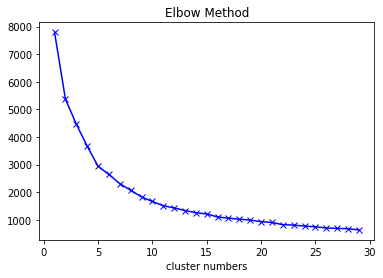

In [ ]:
SSE = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(reduced_data)
    SSE.append(kmeans.inertia_)
    
plt.plot(range(1, 30), SSE, 'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 6
# Define kmeans model
clustering_model = KMeans(n_clusters=num_clusters)

# Fit the embedding with kmeans clustering.
clustering_model.fit(reduced_data)

# Get the cluster id assigned to each news headline.
cluster_assignment = clustering_model.labels_

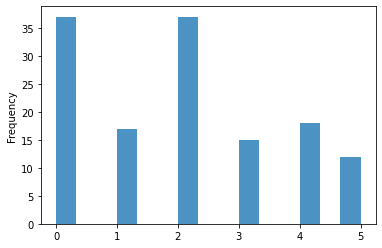

In [ ]:
df_intent = pd.DataFrame()   
df_intent['intent'] = cluster_assignment
ax = df_intent['intent'].plot.hist(bins=15, alpha=0.8)

In [ ]:
for i in range(20):
    print(sentences[i], clustering_model.predict(reduced_data[i].reshape(-1, 1).T))

brand names of combination products [3]
who should not get hepatitis a vaccine or should wait? [2]
browse by generic or brand name: [3]
what is hpv? [3]
who should get this hpv vaccine and when? [2]
what is hpv vaccine? [0]
what are the risks from anthrax vaccine? [0]
who should get je vaccine and when? [2]
how is the janssen (johnson and johnson) covid-19 vaccine given? [5]
what are the risks of the pfizer-biontech covid-19 vaccine? [5]
tell your doctor if ... [3]
why get vaccinated against hepatitis b? [2]
who should get rabies vaccine and when? [2]
talk with your health care provider [3]
what is meningococcal vaccine? [0]
who should not get yellow fever vaccine? [2]
pneumococcal polysaccharide vaccine (ppsv23) [0]
what should you tell the person who is giving the vaccine? [0]
drug [1]
what are the risks from this vaccine? [0]


In [ ]:
k = 0

df['intent'] = ""
for i in df.title.values:
  for j in range(len(sentences)):
    # print(j)
    if i.lower() == sentences[j] : 
       df['intent'][k] = clustering_model.predict(reduced_data[j].reshape(-1, 1).T)[0]
       k += 1 
  # break   

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launch

class_1:  65
class_2:  11954
class_3:  58
class_4:  1837
class_5:  3813
class_5:  16


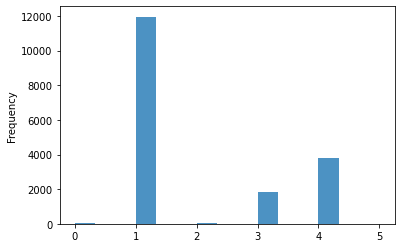

In [ ]:
ax = df['intent'].plot.hist(bins=15, alpha=0.8)

print("class_1: " , (df['intent'] ==0).sum())
print("class_2: " , (df['intent'] ==1).sum())
print("class_3: ", (df['intent'] ==2).sum())
print("class_4: ", (df['intent'] ==3).sum())
print("class_5: ", (df['intent'] ==4).sum())
print("class_5: ", (df['intent'] ==5).sum())

##Doc2vec
https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/

In [ ]:
# p_df = pd.read_json("virgool_removed_word_112_4.json" )
# p_df.head(3)

import pandas as pd
df = pd.read_csv('drug_dataset.csv')
df = pd.DataFrame(df)
df.head(1)

,Section_Number,Link,drug_name,title,text
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...


In [63]:
df["text_Preproce"] = df["text"].str.lower()#.str.split()
df["text_Preproce"] = df["text_Preproce"].str.replace('[^\w\s]',' ')
#####################################
custom_stop_word_list = ['whi']
stop = custom_stop_word_list + stop

df["text_Preproce"] = df["text_Preproce"].apply(lambda x: [item for item in w_tokenizer.tokenize(str(x)) if item not in stop])
#####################################


# Use English stemmer.
stemmer = SnowballStemmer("english")
# df["stemmed"] = df["title"].str.split()
df['text_Preproce'] = df["text_Preproce"].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

# df = df.drop(columns=['stemmed']) # Get rid of the unstemmed column.
#####################################
tokenized_docss = []
def _remove(text):
    s = " "
    s = s.join(text) 
    return (s)

z = df['text_Preproce'].apply(_remove)
df['text_Preproce'] = pd.DataFrame(z)
#####################################

df.head(2)

,Section_Number,Link,drug_name,title,text,text_Preproce
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,dalfampridin use improv walk peopl multipl scl...
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,dalfampridin come extend releas tablet take mo...


In [ ]:
# import
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
df.dropna(subset = ["text_Preproce"], inplace=True)
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(df["text_Preproce"])]
tagged_data

In [67]:
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
# model.wv.vocab

In [ ]:
def get_embeddinngs(text):
    return  model.infer_vector(text)

# Generating sentence embedding from the text
df['emb_New'] = df['question'].apply(get_embeddinngs)

In [ ]:
df.head(2)

,Section_Number,Link,drug_name,title,text,question,text_Preproce,emb_New
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,medic prescrib,dalfampridin use improv walk peopl multipl scl...,"[0.16772282, 0.071075074, -0.11208128, 0.26545..."
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,medicin use,dalfampridin come extend releas tablet take mo...,"[0.114665054, 0.21461496, -0.11354246, 0.08148..."


In [ ]:
# type(df['intent'][0])

int

In [ ]:
# df.drop('intent', inplace=True, axis=1)

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 6
# Define kmeans model
clustering_model = KMeans(n_clusters=num_clusters)

# Fit the embedding with kmeans clustering.
clustering_model.fit(corpus_embeddings)

# Get the cluster id assigned to each news headline.
cluster_assignment = clustering_model.labels_

In [ ]:
df.head(2)

,Section_Number,Link,drug_name,title,text,question,text_Preproce,emb_New,cluster,centroid,intent
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,medic prescrib,dalfampridin use improv walk peopl multipl scl...,"[0.16772282, 0.071075074, -0.11208128, 0.26545...",4,"[0.13428995, 0.061471272, -0.16710436, 0.26398...",1
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,medicin use,dalfampridin come extend releas tablet take mo...,"[0.114665054, 0.21461496, -0.11354246, 0.08148...",2,"[0.074623585, 0.23444764, -0.1196898, -0.00156...",1


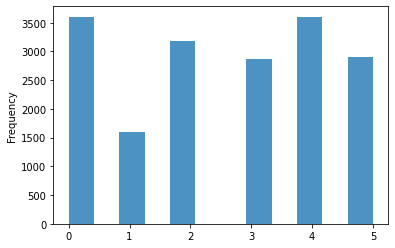

In [ ]:
ax = df['cluster'].plot.hist(bins=12, alpha=0.8)

In [ ]:
test_doc = word_tokenize("I had pizza and pasta".lower())
test_doc_vector = model.infer_vector(test_doc)

'''
positive = List of sentences that contribute positively.
'''
model.docvecs.most_similar(positive = [test_doc_vector])



[(23, 0.2791650593280792),
 (17, 0.20014172792434692),
 (75, 0.19645734131336212),
 (85, 0.1653636395931244),
 (81, 0.1634170413017273),
 (95, 0.16275329887866974),
 (15, 0.15630249679088593),
 (87, 0.15292072296142578),
 (96, 0.15206947922706604),
 (54, 0.14647649228572845)]

##Analysis

In [48]:
gear_count = pd.value_counts(df.drug_name)
len(gear_count)

1616

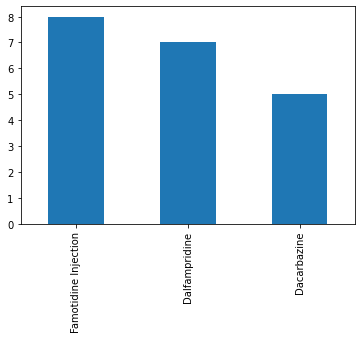

In [49]:
pd.value_counts(df.drug_name[:20]).plot(kind="bar")

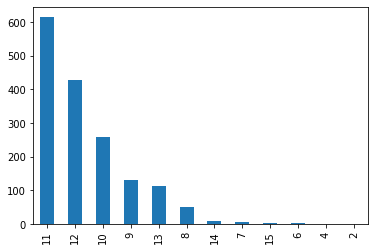

In [50]:
s = df.groupby("drug_name").Section_Number.agg(lambda x:len(x.unique()))
pd.value_counts(s).plot(kind="bar")

In [51]:
s

drug_name
Abacavir                                  13
Abacavir, Dolutegravir, and Lamivudine    12
Abacavir, Lamivudine, and Zidovudine      12
Abaloparatide Injection                   12
Abatacept Injection                       11
                                          ..
Zoledronic Acid Injection                 11
Zolmitriptan                              10
Zolmitriptan Nasal Spray                  10
Zolpidem                                  12
Zonisamide                                11
Name: Section_Number, Length: 1616, dtype: int64